# mlp

> Building blocks for Mulit Layer Perceptron network

In [ ]:
# | default_exp mlp

In [ ]:
# | hide
from nbdev.showdoc import *
from fastcore.test import *

In [ ]:
# | export
from fastcore.utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# | export
class Perceptron:
    "A perceptron model"

    def __init__(
        self,
        no_of_inputs: int,
        no_of_iterations: int = 1000,
        learning_rate: float = 0.1
    ) -> None:
        self.no_of_inputs = no_of_inputs
        self.no_of_iterations = no_of_iterations
        self.learning_rate = learning_rate
        self.weights = np.zeros(self.no_of_inputs + 1) ## TODO change to random values close to 0

    def __str__(self) -> str:
        "When printing show current `weights`"
        return f"{self.weights}"

    __repr__ = __str__  # Same jupyter representation as print


Example dataset:

In [ ]:
df = pd.DataFrame([[1, 0, 1],[1, 1, 1],[0, 1, 0]])
df.columns = ['x1', 'x2', 'y']
groups = df.groupby('y')
df

,x1,x2,y
0,1,0,1
1,1,1,1
2,0,1,0


Here's how it looks like

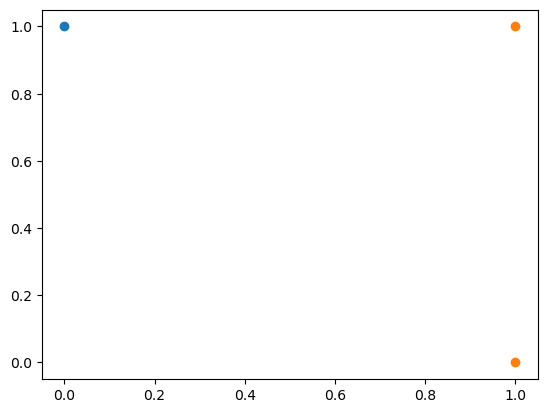

In [ ]:
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.x1, group.x2, marker='o', label=name, linestyle='')

Here's an example of creating and displaying `Perceptron` by displaying we mean showing its `weights`. At the beggining all weights are initialized by `0`

In [ ]:
p = Perceptron(2)
p

[0. 0. 0.]

## Training

In [ ]:
# | export
@patch
def activation_function(
    self: Perceptron,
    x: float # Weighted input to neuron
):
    "Temporary inner basic activation function -- positivity check"
    if x >= 0:
        return 1
    else:
        return 0


In [ ]:
# | export
@patch
def output(
    self: Perceptron,
    x # Values in columns from input data
):
    "Output from neuron `f(x^Tw)`"
    return self.activation_function(np.dot(self.weights[1:], x) + self.weights[0])


In [ ]:
#| export
@patch
def train(
        self:Perceptron,
        data_x, # Input data columns
        data_y # Correct labels
):
    "Training loop repeted `no_of_iterations` times"
    for _ in range(self.no_of_iterations):
        # ZAD. DOM losowanie przykładów
        for x, y in zip(data_x, data_y):
            prediction = self.output(x)
            self.weights[1:] += self.learning_rate * (y - prediction) * x
            self.weights[0] += self.learning_rate * (y - prediction)

Let's train our model on previous example dataset and check how the `weights` will change

In [ ]:
x = df[["x1","x2"]].to_numpy()
y = df["y"].to_numpy()
p.train(x, y)
p

[ 0.   0.1 -0.1]

After training is done we can predict outputs and compare it with original labels

In [ ]:
for xi, l in zip(x, y):
    print(l, p.output(xi))

1 1
1 1
0 0


We can also plot the line that splits data points

y = 1.0 * x + 0.0


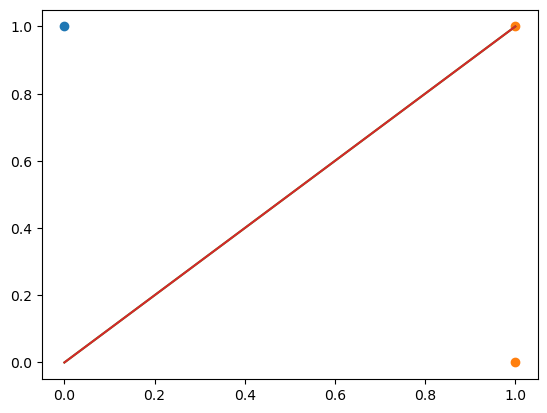

In [ ]:
a = -p.weights[1]/p.weights[2]
b = -p.weights[0]/p.weights[2]

def f(t):
    return a*t + b

print(f"y = {a} * x + {b}")

ax.plot(x, f(x), linestyle='-')
fig

In [ ]:
# | hide
## TODO
"""
# loop creating one-hot-encoding for numbers and training model
np.ravel(input_number_0-9) # numbers are 7x5 matrices
list_of_10_perceptrons
for i in range(10):
    labels = np.zeros(10)
    labels[i] = 1
    perceptron[i].train(training_data, labels)
"""

'\n# loop creating one-hot-encoding for numbers and training model\nnp.ravel(input_number_0-9) # numbers are 7x5 matrices\nlist_of_10_perceptrons\nfor i in range(10):\n    labels = np.zeros(10)\n    labels[i] = 1\n    perceptron[i].train(training_data, labels)\n'

In [ ]:
# | hide
import nbdev

nbdev.nbdev_export()